# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 10.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (COMP)
# VIENNA 11035

In [3]:
loc = 'Vienna 11035'

---

## Loading Data:

All data has been downloaded via the cds-api in a similar manner like depicted in 'IGRA_Comparison_Request.ipynb'. 

In [4]:
files = glob.glob('/raid60/scratch/uli/igracomp/IGRA_11035/*/*.csv')
files_h = glob.glob('/raid60/scratch/uli/igracomp/IGRA_H_11035/*/*.csv')
print(len(files) == len(files_h))

True


In [5]:
# IGRA and its harmonized version
for i in range(len(files)):
    if i == 0:
        igra = pandas.read_csv(files[i], header=12)
        igrah = pandas.read_csv(files_h[i], header=12)
    else:
        igra = igra.append(pandas.read_csv(files[i], header=12))
        igrah = igrah.append(pandas.read_csv(files_h[i], header=12))

In [6]:
# COMP - Comprehensive upper-air observation network from 1905 to present
files = glob.glob('/raid60/scratch/uli/comp/COMP_11035/*/temperature.csv')
for i in range(len(files)):
    if i == 0:
        comp = pandas.read_csv(files[i])
    else:
        comp = comp.append(pandas.read_csv(files[i]))

In [7]:
comp = comp[comp.time < '2018-10'] # igra data is only available up to Oct.2018, so we shorten the comp data

## A first look at the available data
We take a look at four standard pressure levels on the temperature data of both data sets.


## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

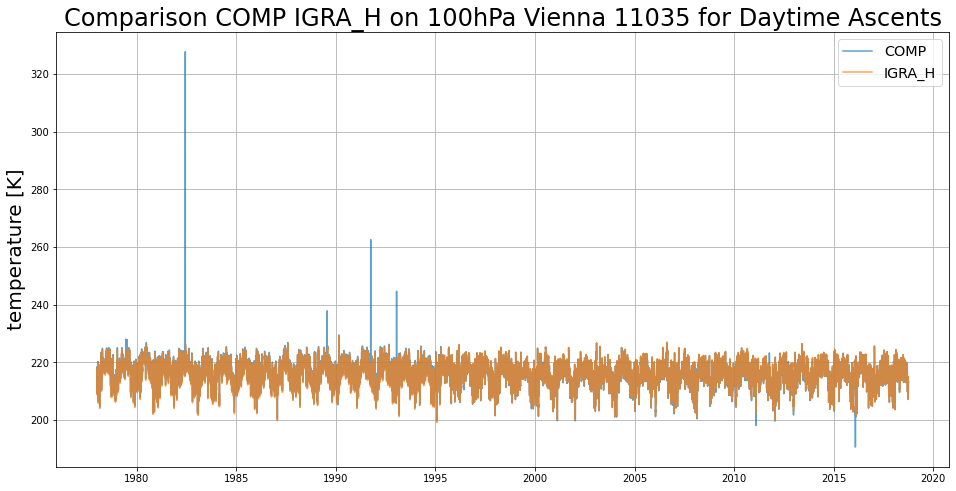

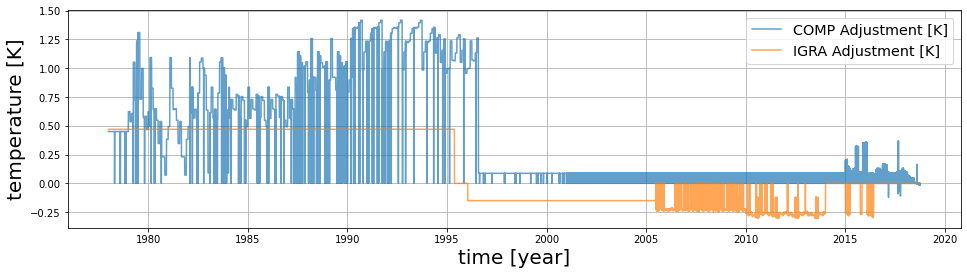

COMP Adjustment MEAN: 0.2950682360466451
COMP Adjustment MIN: -0.12
COMP Adjustment MAX: 1.4166778
IGRA Adjustment MEAN: 0.11136344969199131
IGRA Adjustment MIN: -0.30000000000001137
IGRA Adjustment MAX: 0.46999999999999886


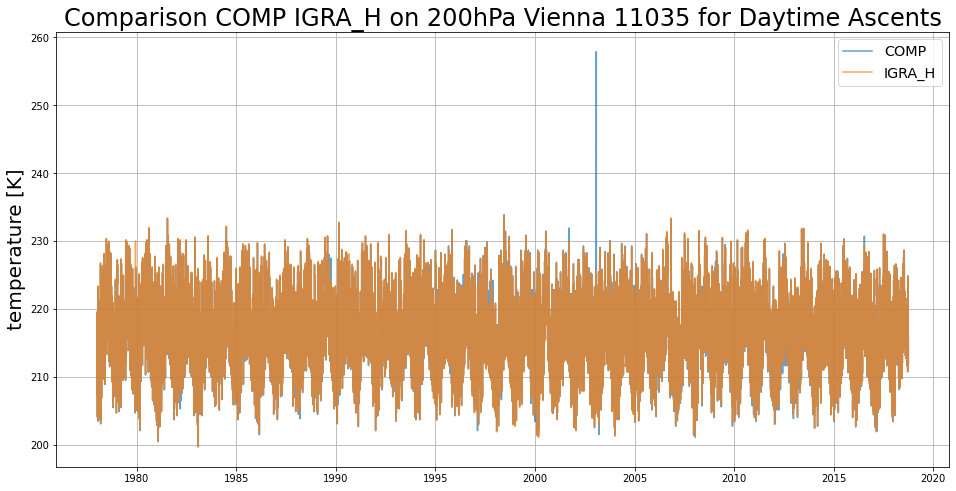

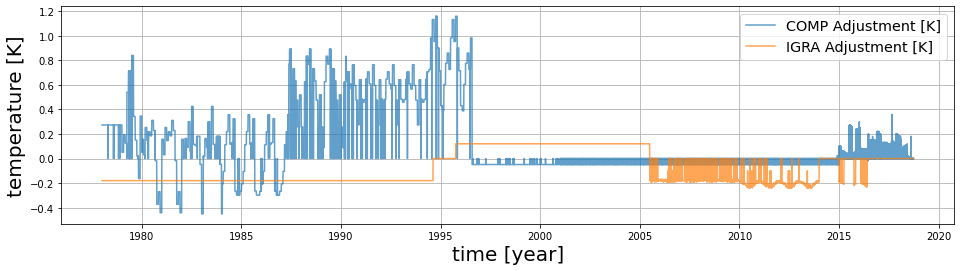

COMP Adjustment MEAN: 0.09379851502726394
COMP Adjustment MIN: -0.450769
COMP Adjustment MAX: 1.1582059
IGRA Adjustment MEAN: -0.08552021932830783
IGRA Adjustment MIN: -0.2400000000000091
IGRA Adjustment MAX: 0.12000000000000455


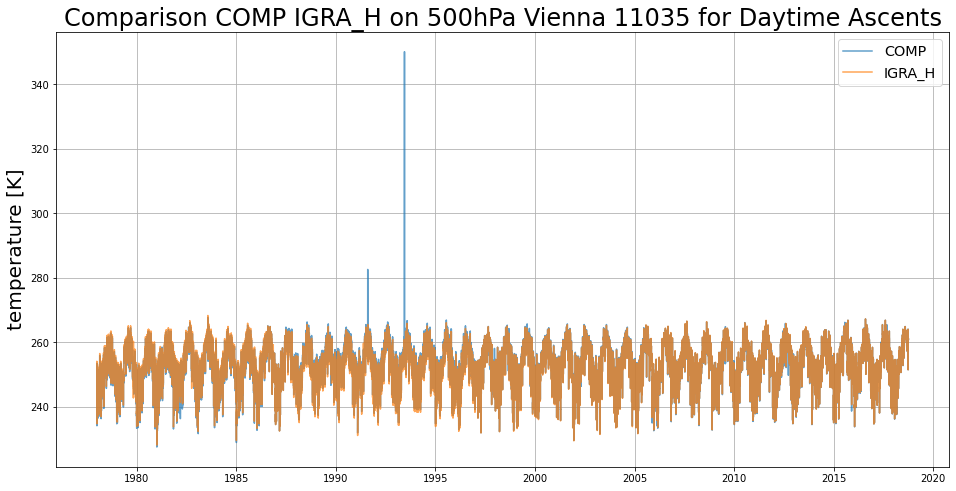

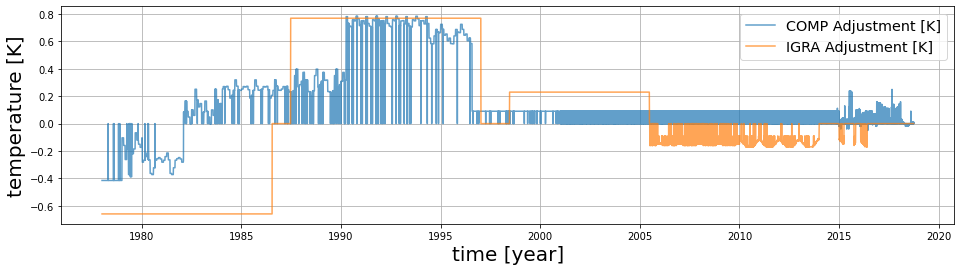

COMP Adjustment MEAN: 0.11253568750241068
COMP Adjustment MIN: -0.4154892
COMP Adjustment MAX: 0.7844114000000001
IGRA Adjustment MEAN: 0.04618314868007047
IGRA Adjustment MIN: -0.660000000000025
IGRA Adjustment MAX: 0.7700000000000387


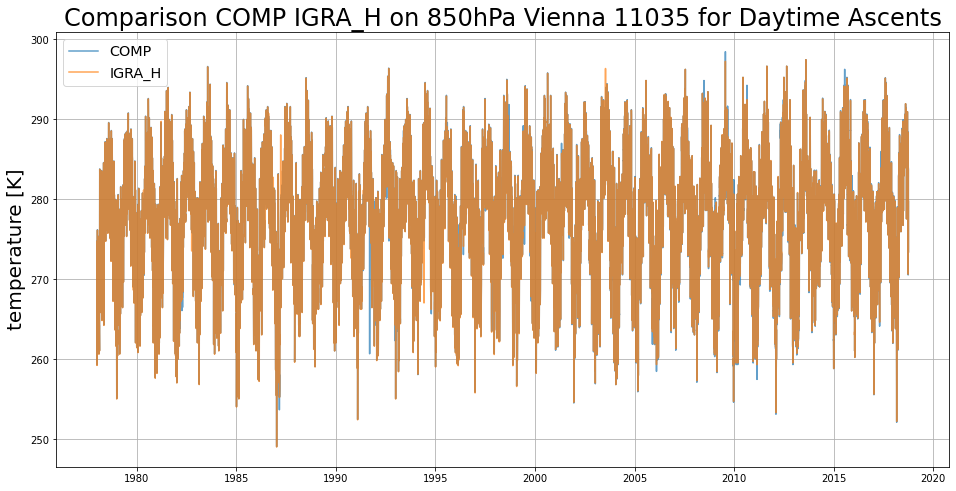

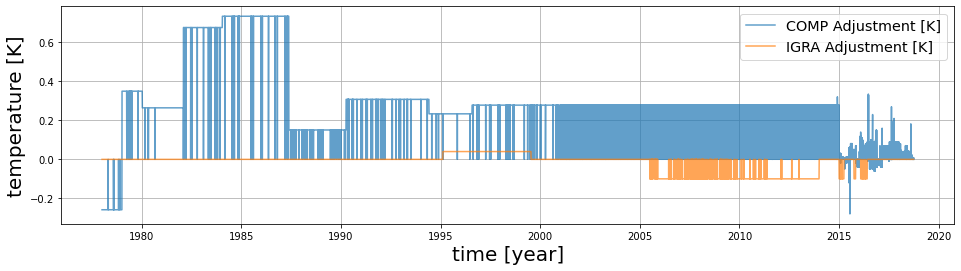

COMP Adjustment MEAN: 0.19135568816364948
COMP Adjustment MIN: -0.27999672
COMP Adjustment MAX: 0.7344350000000001
IGRA Adjustment MEAN: -0.017040383299110128
IGRA Adjustment MIN: -0.10000000000002274
IGRA Adjustment MAX: 0.040000000000020464


In [8]:
preslist = [10000, 20000, 50000, 85000,]
comp_untreated_day = []
igra_untreated_day = []
igrah_untreated_day = []
for i in preslist:
    a = igra[igra.air_pressure == i]
    a.report_timestamp = pandas.to_datetime(a.report_timestamp, utc=True)
    a = a[a.report_timestamp.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17])]
    b = igrah[igrah.air_pressure == i]
    b.report_timestamp = pandas.to_datetime(b.report_timestamp, utc=True)
    b = b[b.report_timestamp.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17])]
    c = comp[comp.plev == i]
    c.time = pandas.to_datetime(c.time, utc=True)
    c = c[c.time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17])]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(int(i/100))+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))
    comp_untreated_day.append(c)
    igra_untreated_day.append(a)
    igrah_untreated_day.append(b)


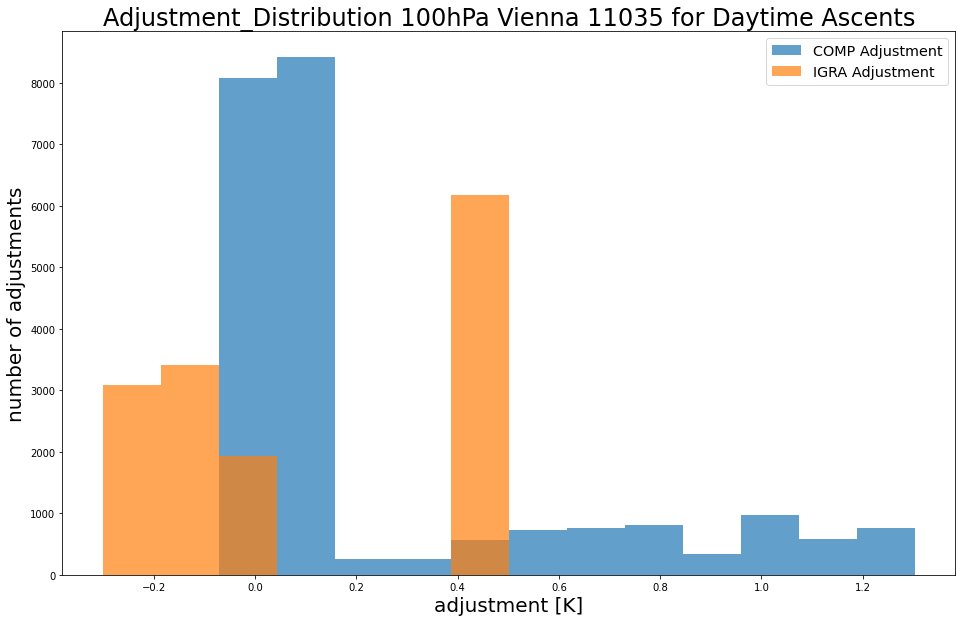

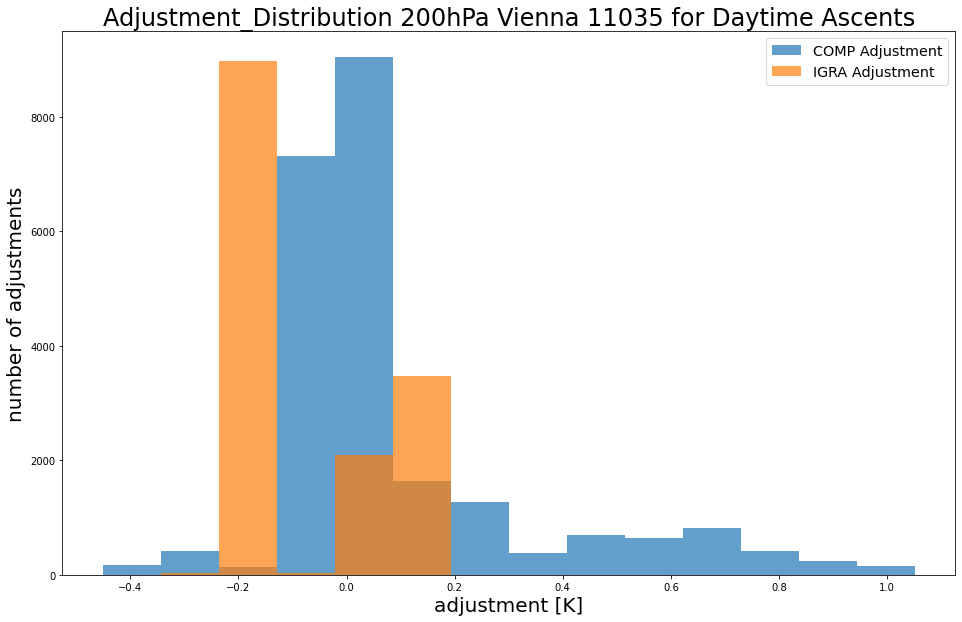

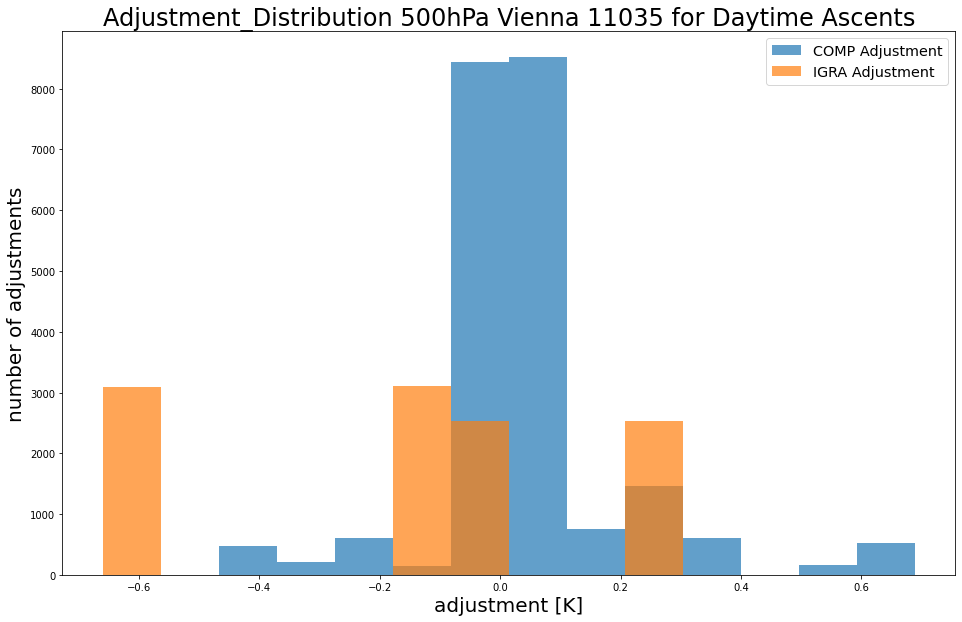

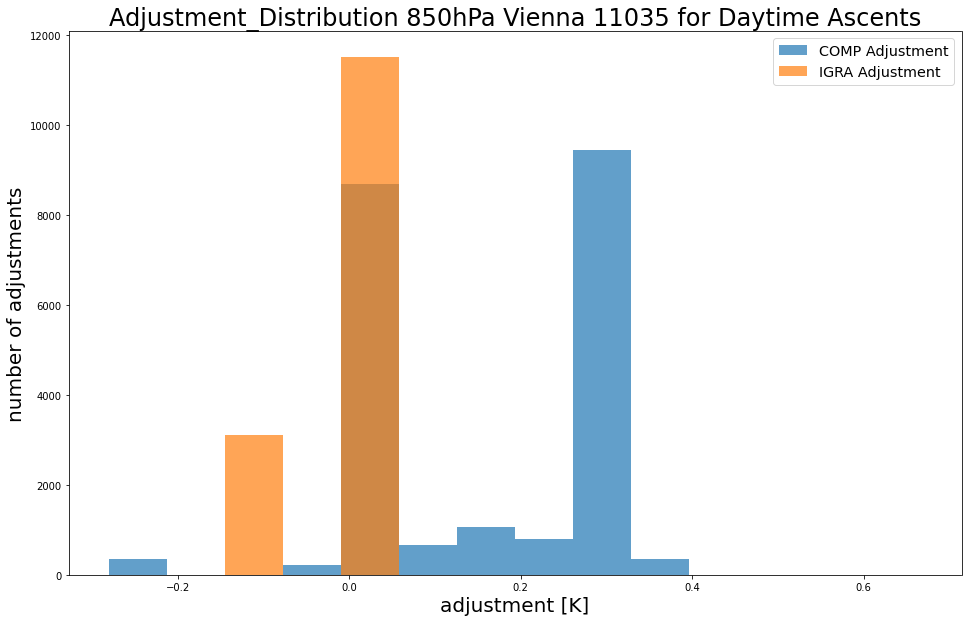

In [9]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_untreated_day[i]
    b = igrah_untreated_day[i]
    c = comp_untreated_day[i]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

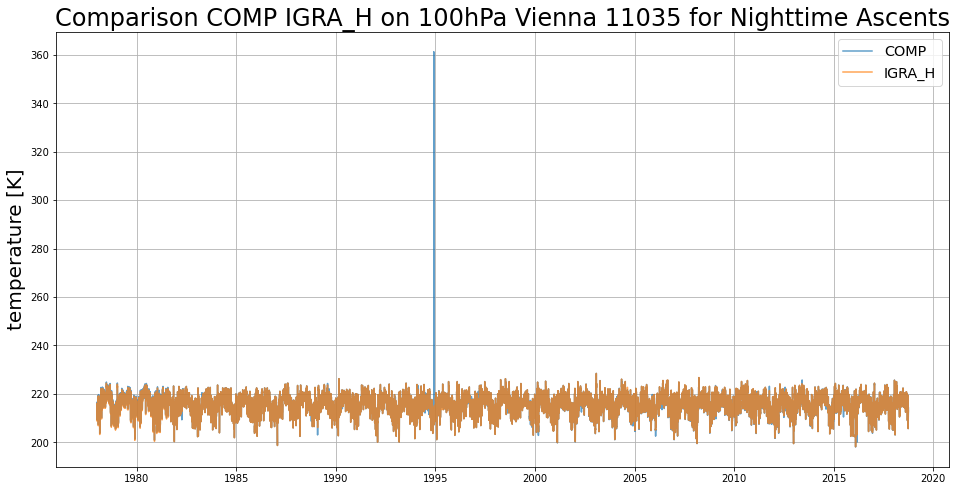

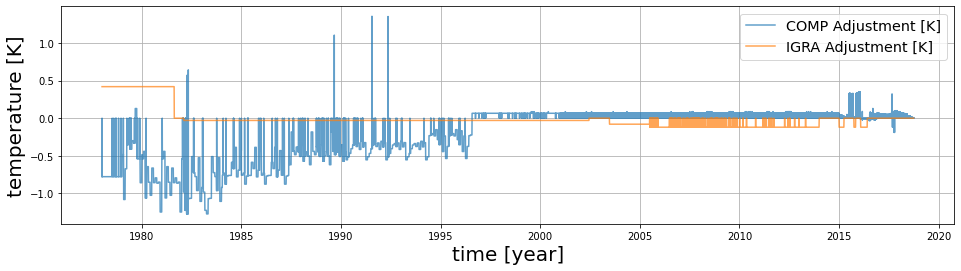

COMP Adjustment MEAN: -0.14212677069714078
COMP Adjustment MIN: -1.2750107
COMP Adjustment MAX: 1.3577101999999999
IGRA Adjustment MEAN: -0.006518783050615125
IGRA Adjustment MIN: -0.12000000000000455
IGRA Adjustment MAX: 0.4200000000000159


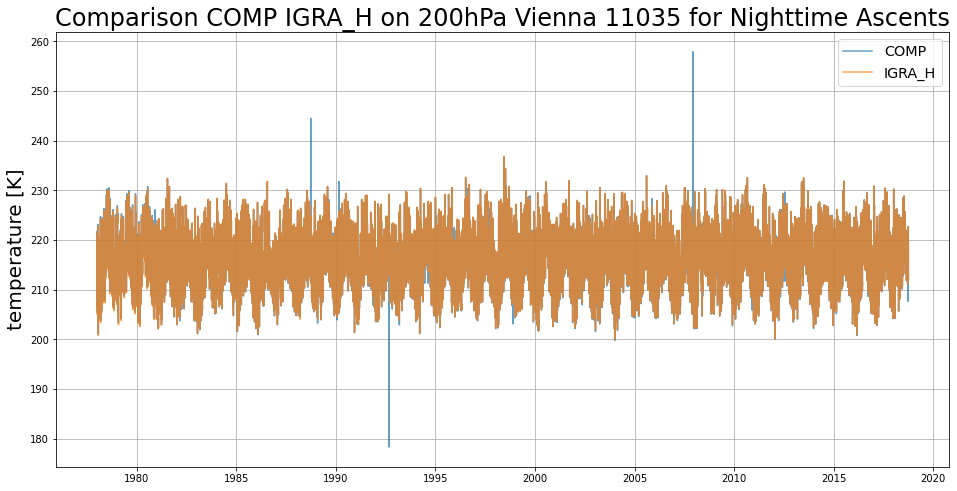

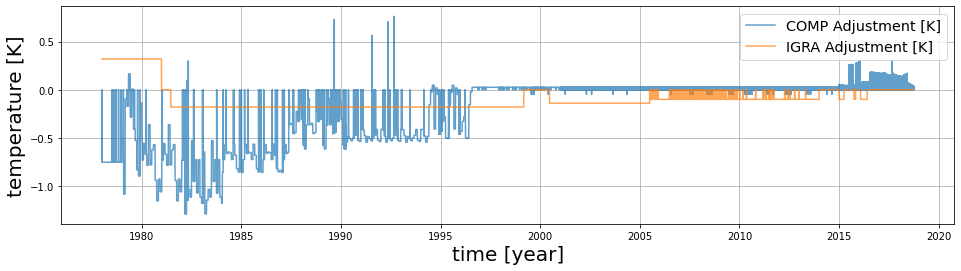

COMP Adjustment MEAN: -0.14908670013377218
COMP Adjustment MIN: -1.2905188
COMP Adjustment MAX: 0.76361865
IGRA Adjustment MEAN: -0.0922235939643351
IGRA Adjustment MIN: -0.18000000000000682
IGRA Adjustment MAX: 0.3200000000000216


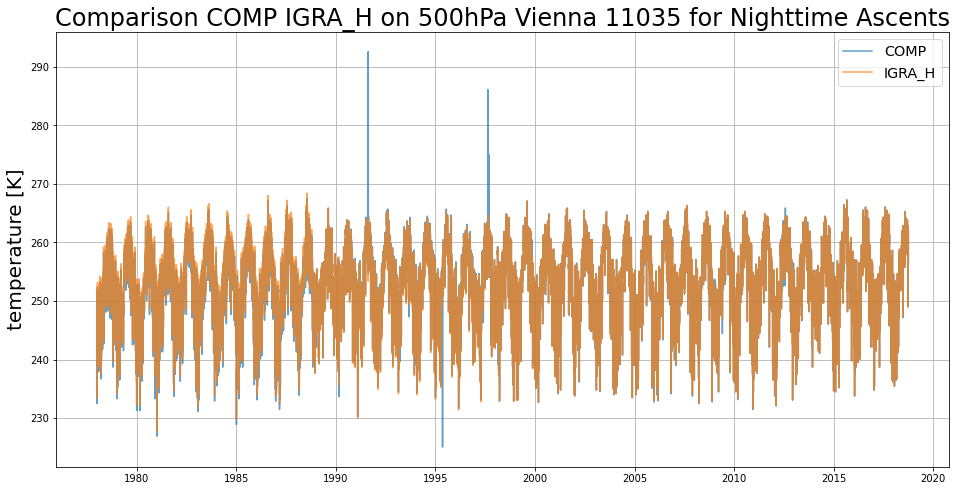

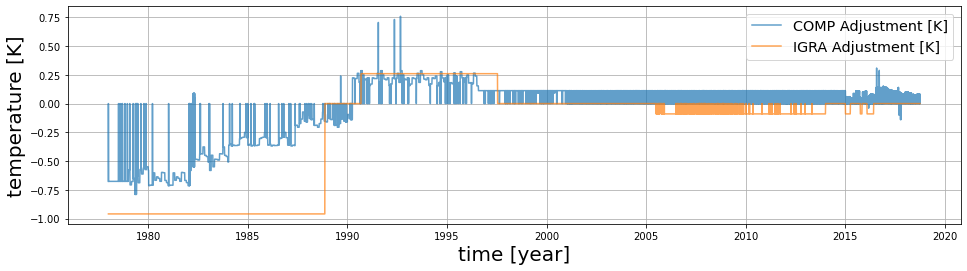

COMP Adjustment MEAN: -0.018922432591286672
COMP Adjustment MIN: -0.7902123000000001
COMP Adjustment MAX: 0.75954264
IGRA Adjustment MEAN: -0.23381799521040003
IGRA Adjustment MIN: -0.9600000000000364
IGRA Adjustment MAX: 0.26000000000004775


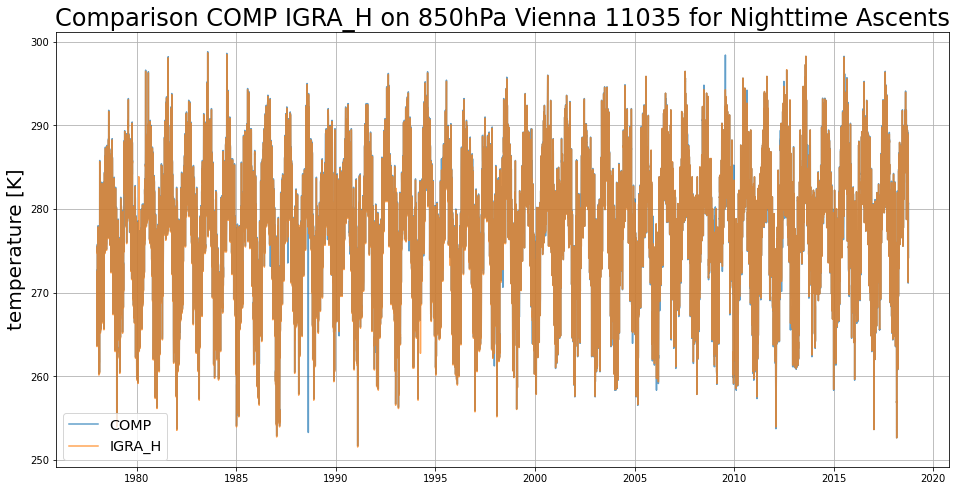

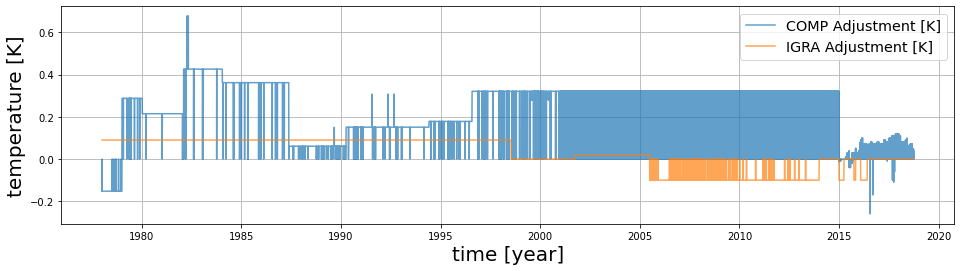

COMP Adjustment MEAN: 0.16065527467336682
COMP Adjustment MIN: -0.26
COMP Adjustment MAX: 0.6764051999999999
IGRA Adjustment MEAN: 0.02557801685739656
IGRA Adjustment MIN: -0.10000000000002274
IGRA Adjustment MAX: 0.09000000000003183


In [10]:
preslist = [10000, 20000, 50000, 85000,]
comp_untreated_night = []
igra_untreated_night = []
igrah_untreated_night = []
for i in preslist:
    a = igra[igra.air_pressure == i]
    a.report_timestamp = pandas.to_datetime(a.report_timestamp, utc=True)
    a = a[a.report_timestamp.dt.hour.isin([18,19,20,21,22,23,0,1,2,3,4,5])]
    b = igrah[igrah.air_pressure == i]
    b.report_timestamp = pandas.to_datetime(b.report_timestamp, utc=True)
    b = b[b.report_timestamp.dt.hour.isin([18,19,20,21,22,23,0,1,2,3,4,5])]
    c = comp[comp.plev == i]
    c.time = pandas.to_datetime(c.time, utc=True)
    c = c[c.time.dt.hour.isin([18,19,20,21,22,23,0,1,2,3,4,5])]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(int(i/100))+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))
    comp_untreated_night.append(c)
    igra_untreated_night.append(a)
    igrah_untreated_night.append(b)

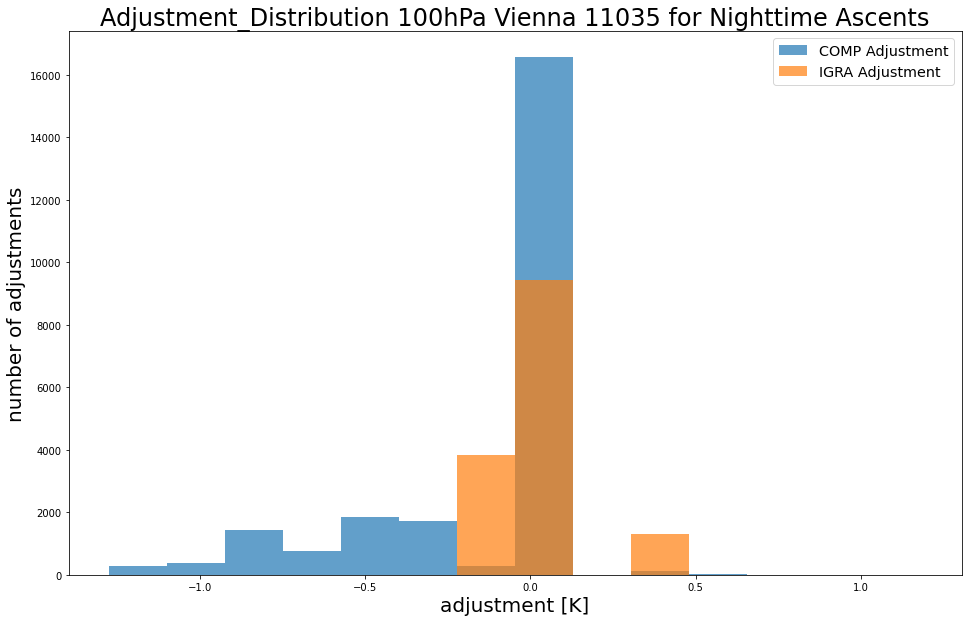

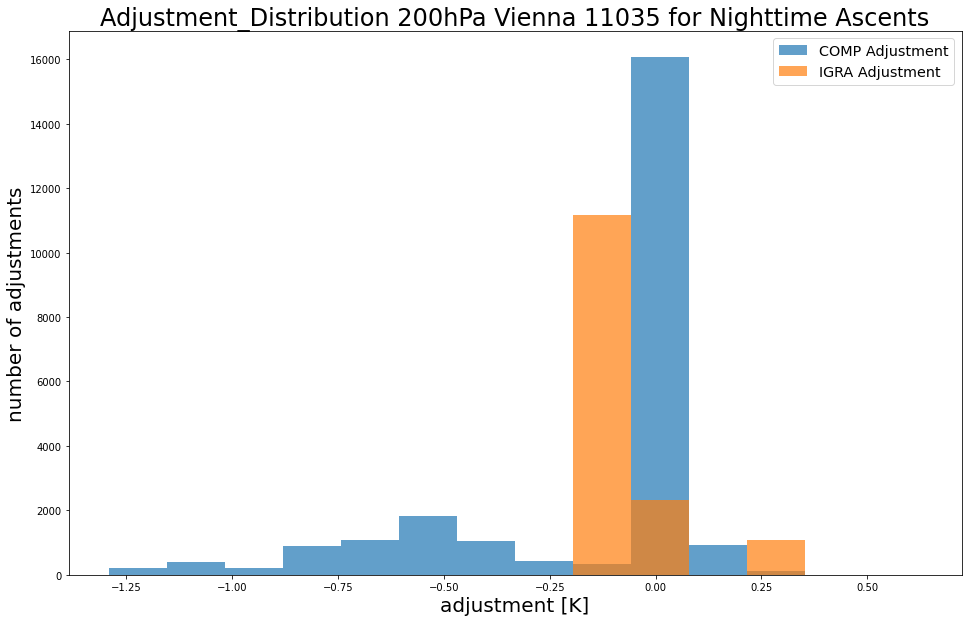

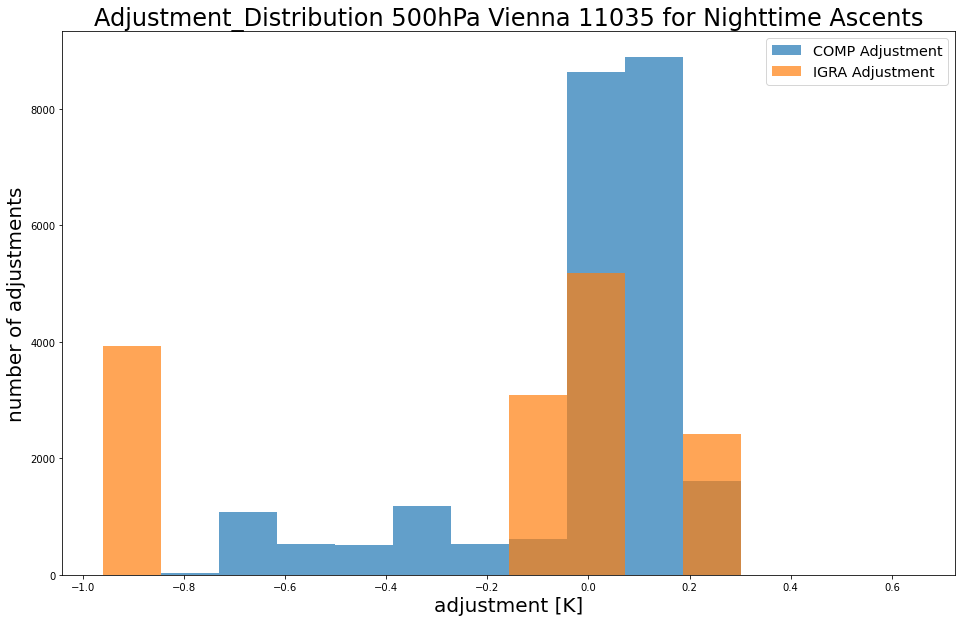

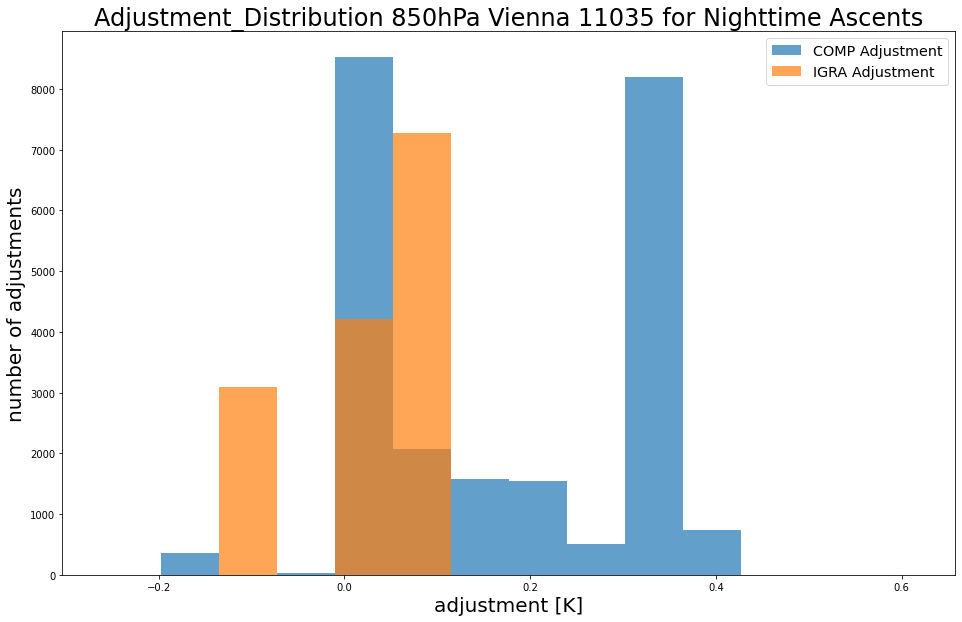

In [11]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_untreated_night[i]
    b = igrah_untreated_night[i]
    c = comp_untreated_night[i]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


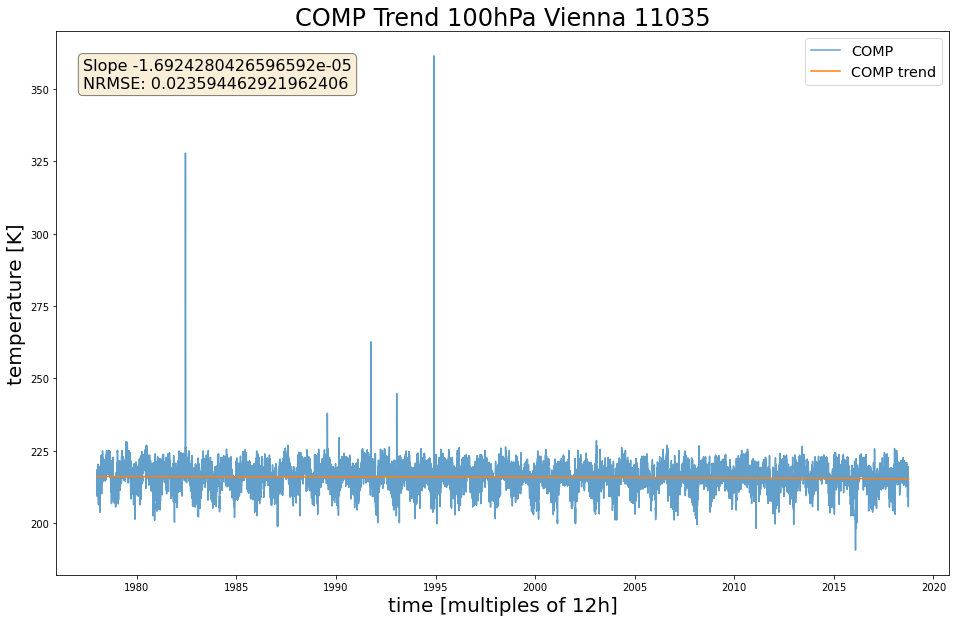

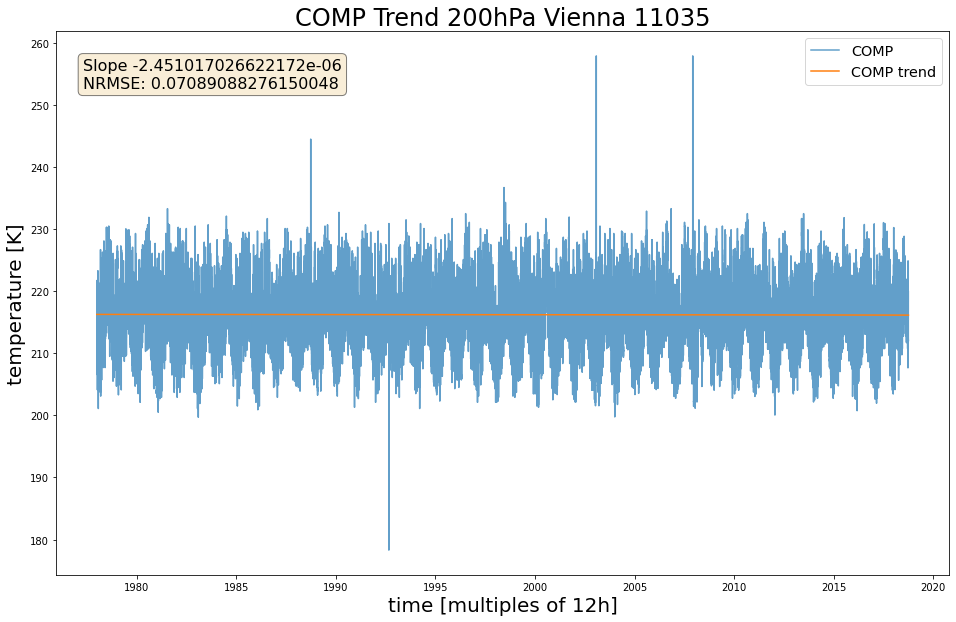

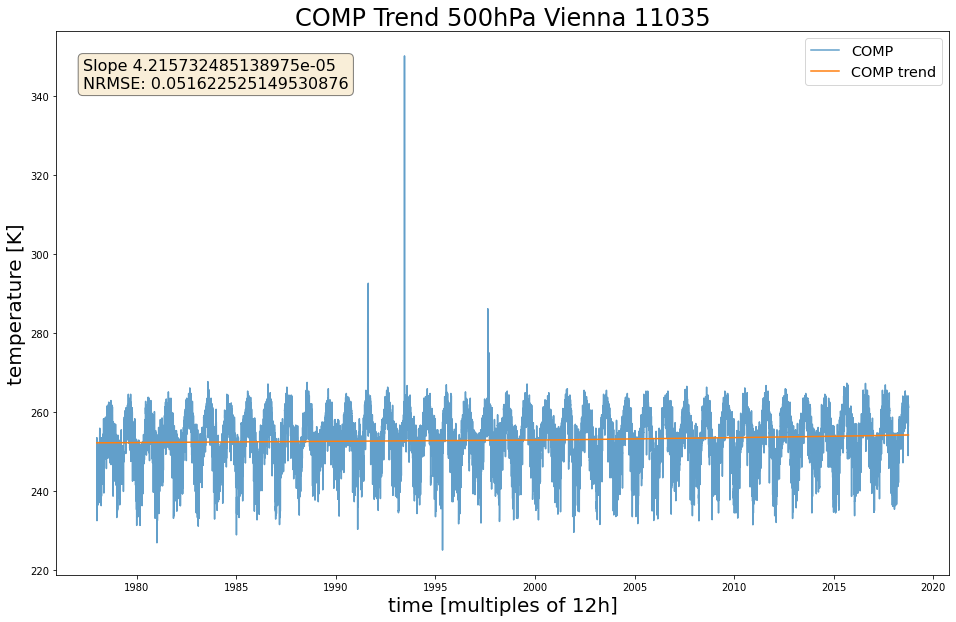

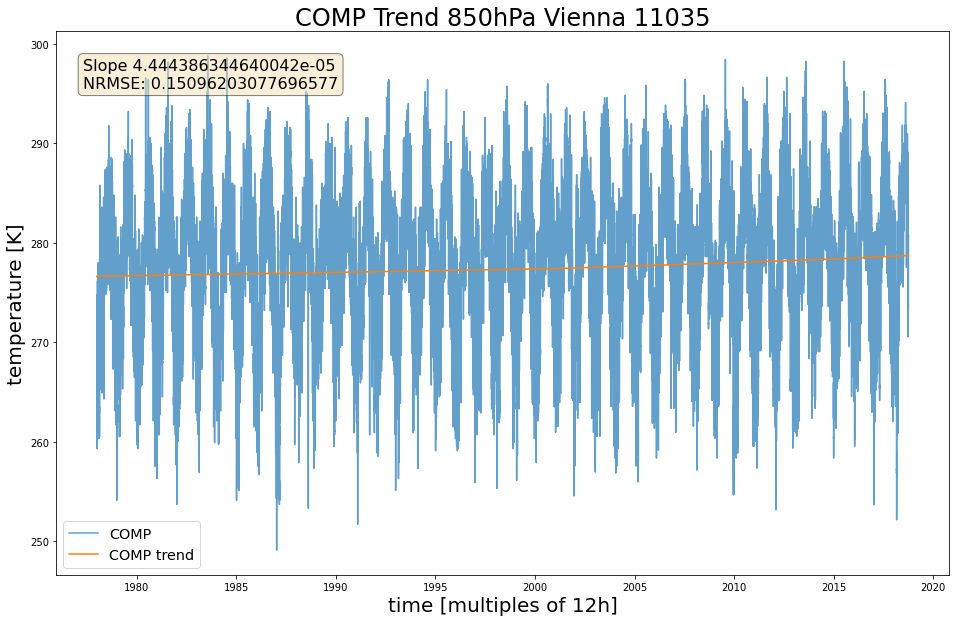

In [12]:
preslist = [10000, 20000, 50000, 85000,]
for i in range(len(preslist)):
    c = comp[comp.plev == preslist[i]]
    c.time = pandas.to_datetime(c.time, utc=True)
    xax = np.asarray(c.time)
    
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(int(preslist[i]/100))+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.95, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

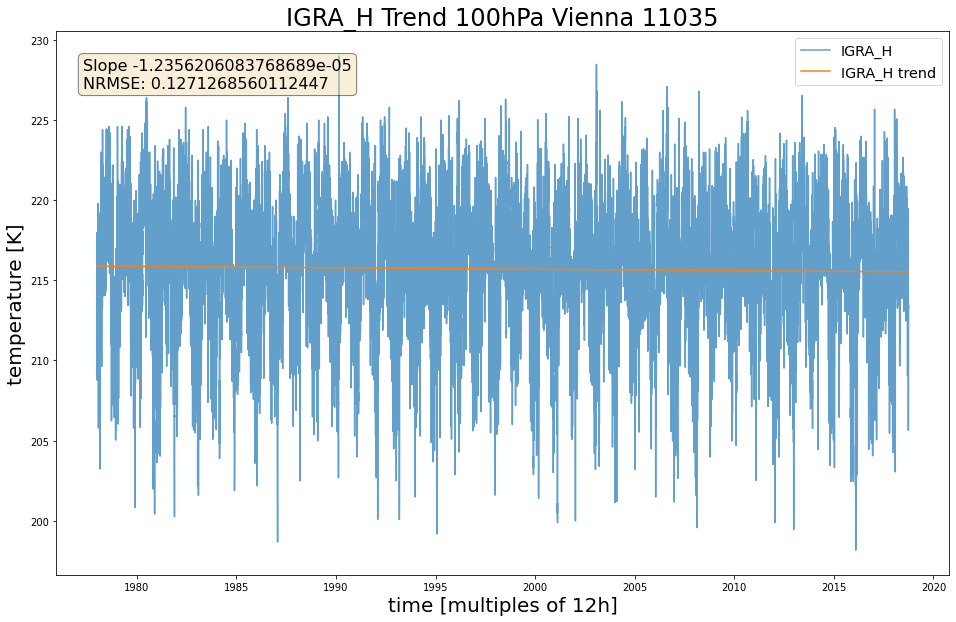

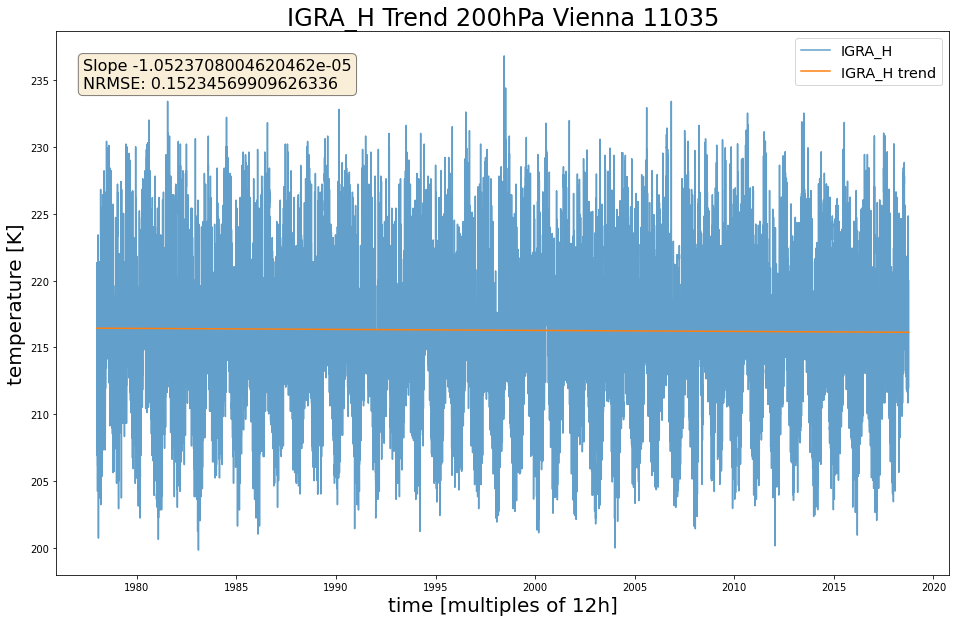

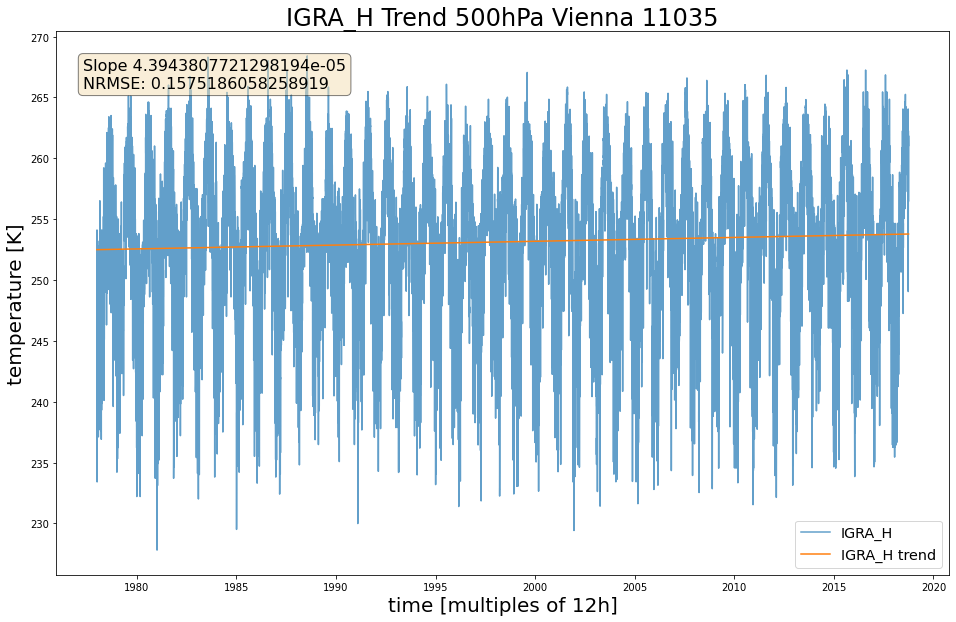

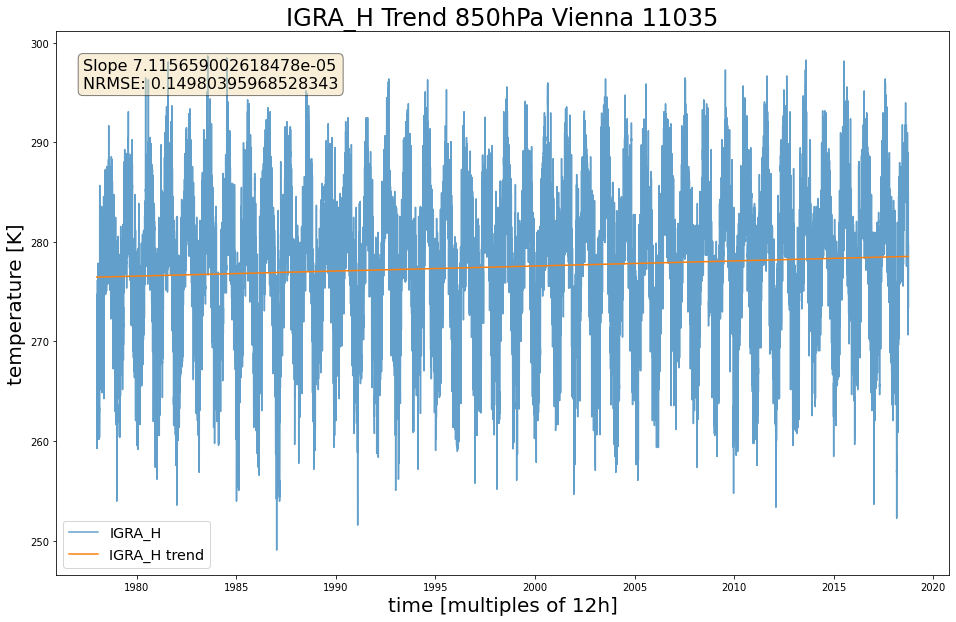

In [13]:
preslist = [10000, 20000, 50000, 85000,]
for i in range(len(preslist)):
    b = igrah[igrah.air_pressure == preslist[i]]
    b.report_timestamp = pandas.to_datetime(b.report_timestamp, utc=True)
    xax = np.asarray(b.report_timestamp)
    
    selected = b.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(int(preslist[i]/100))+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.95, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

# Further visualisation:
Now that the trend is plotted, we will display the detrended data. <br>
The adjustments will stay untouched and are exactly the same like displayed above.

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
This also detrends the data.

In [14]:
comp_ma = []
igra_h_ma = []
igra_ma = []
for i in range(len(comp_untreated_day)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_untreated_day[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_untreated_day[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_untreated_day[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_untreated_day[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_untreated_day[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igrah_untreated_day[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

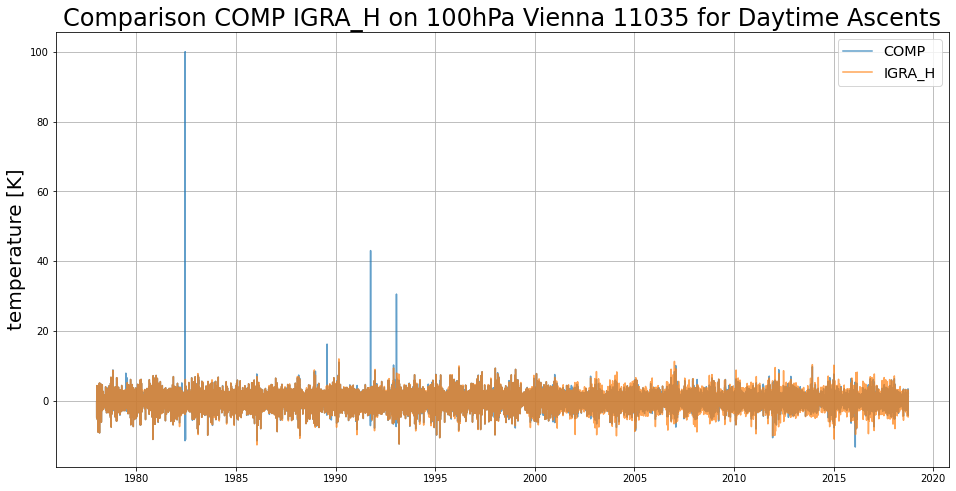

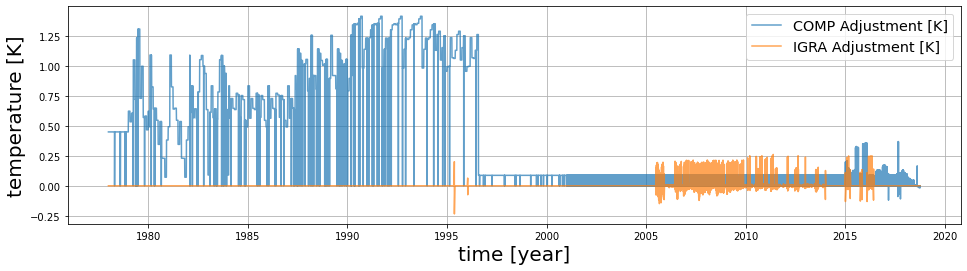

COMP Adjustment MEAN: 0.2950682360466451
COMP Adjustment MIN: -0.12
COMP Adjustment MAX: 1.4166778
IGRA Adjustment MEAN: -1.6084873375971933e-05
IGRA Adjustment MIN: -0.23499999999998522
IGRA Adjustment MAX: 0.2621428571428339


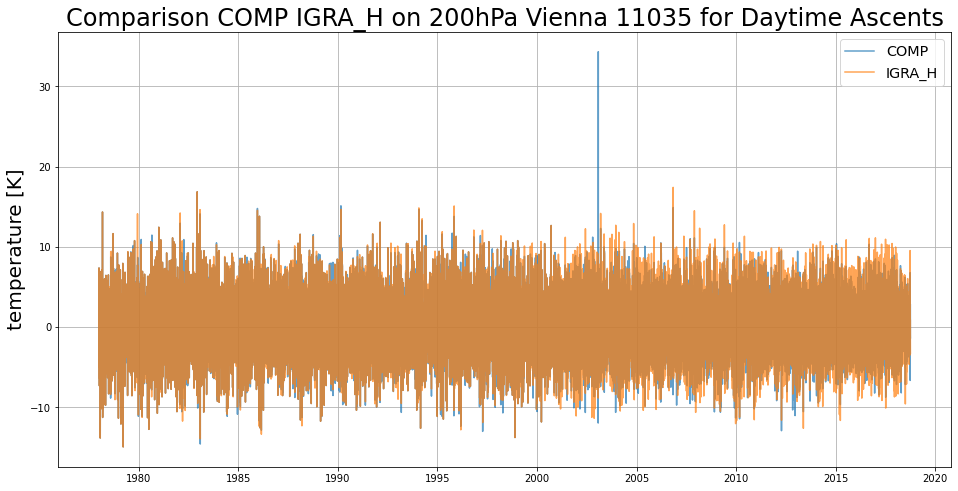

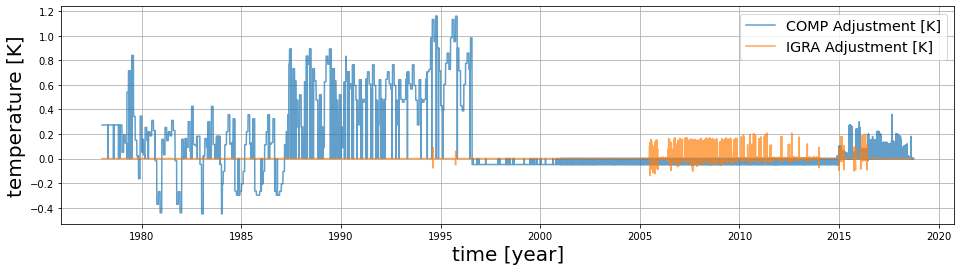

COMP Adjustment MEAN: 0.09379851502726394
COMP Adjustment MIN: -0.450769
COMP Adjustment MAX: 1.1582059
IGRA Adjustment MEAN: 6.168608634283516e-06
IGRA Adjustment MIN: -0.13928571428570535
IGRA Adjustment MAX: 0.20714285714291236


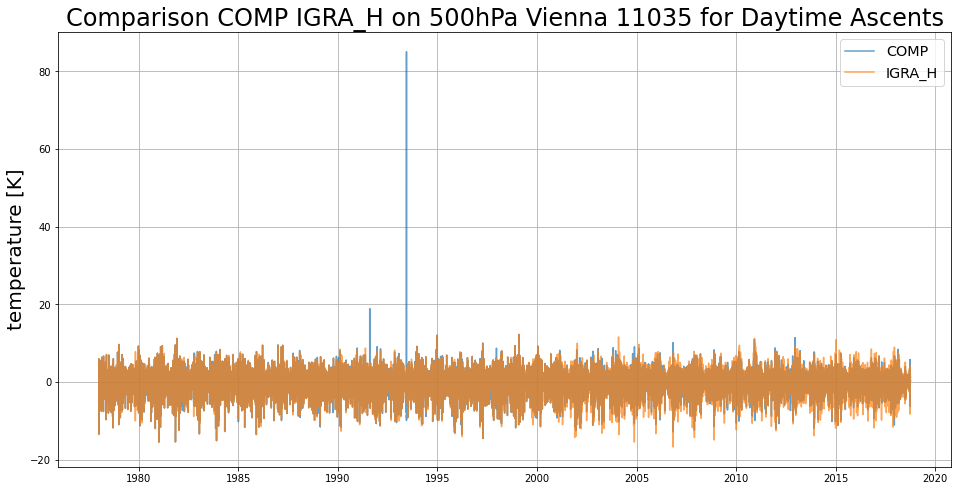

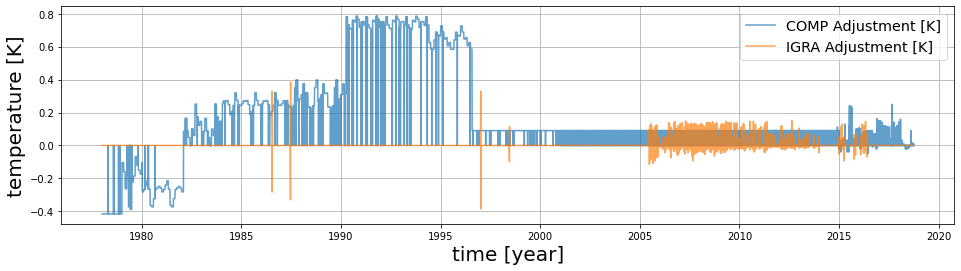

COMP Adjustment MEAN: 0.11253568750241068
COMP Adjustment MIN: -0.4154892
COMP Adjustment MAX: 0.7844114000000001
IGRA Adjustment MEAN: 2.2568732046490474e-05
IGRA Adjustment MIN: -0.3849999999999909
IGRA Adjustment MAX: 0.3850000000000193


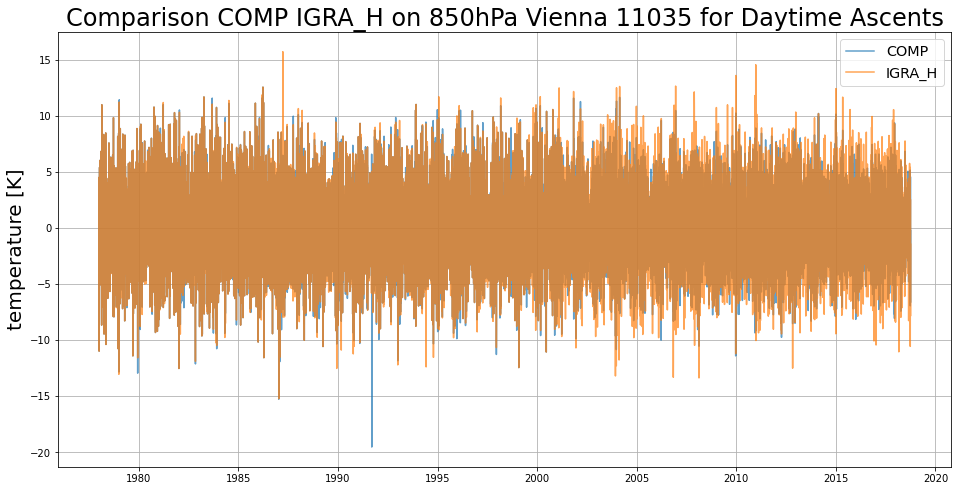

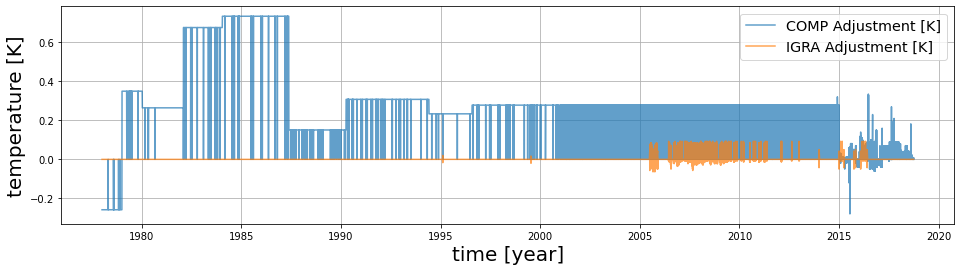

COMP Adjustment MEAN: 0.19135568816364948
COMP Adjustment MIN: -0.27999672
COMP Adjustment MAX: 0.7344350000000001
IGRA Adjustment MEAN: -1.3033911922224973e-16
IGRA Adjustment MIN: -0.06428571428574514
IGRA Adjustment MAX: 0.0928571428572127


In [15]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    b = igra_h_ma[i]
    c = comp_ma[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(a.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))


In [16]:
comp_ma = []
igra_h_ma = []
igra_ma = []
for i in range(len(comp_untreated_day)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_untreated_night[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_untreated_night[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_untreated_night[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_untreated_night[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_untreated_night[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igrah_untreated_night[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

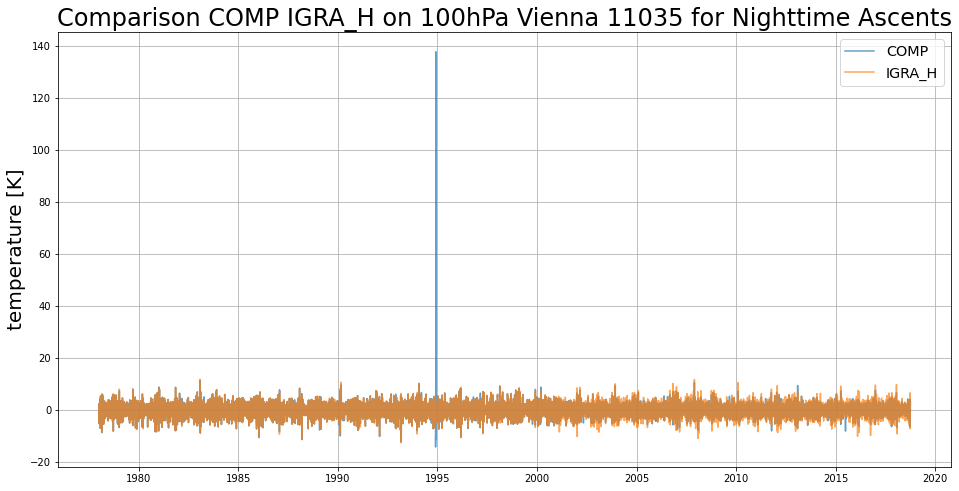

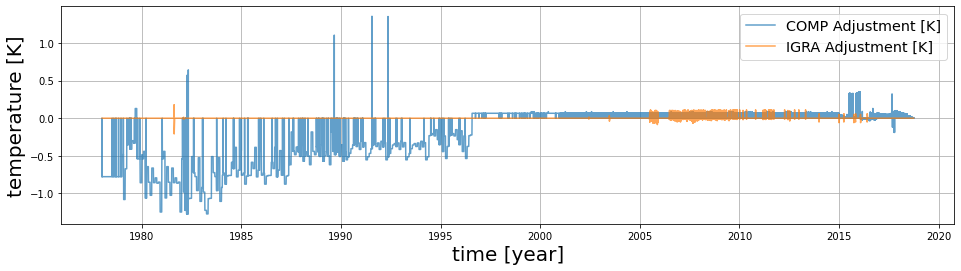

COMP Adjustment MEAN: -0.14212677069714078
COMP Adjustment MIN: -1.2750107
COMP Adjustment MAX: 1.3577101999999999
IGRA Adjustment MEAN: -1.4422086396822883e-05
IGRA Adjustment MIN: -0.21000000000000796
IGRA Adjustment MAX: 0.18000000000000682


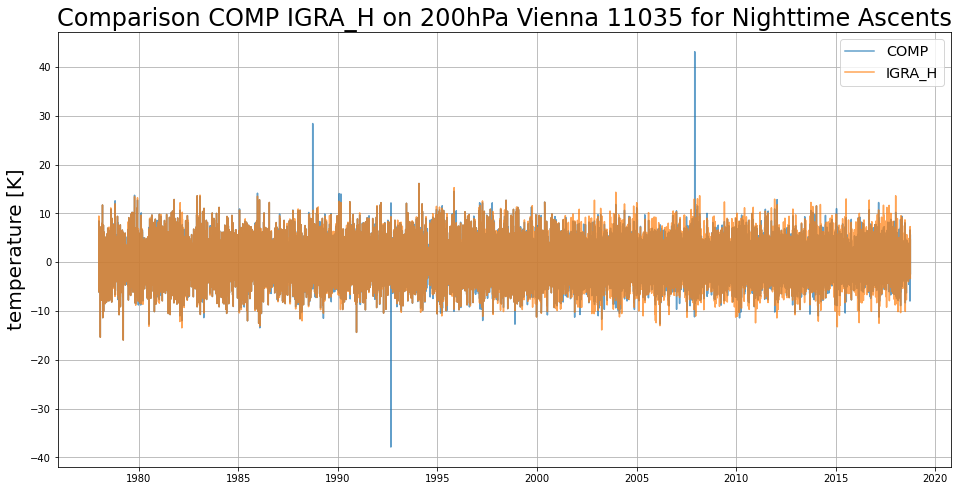

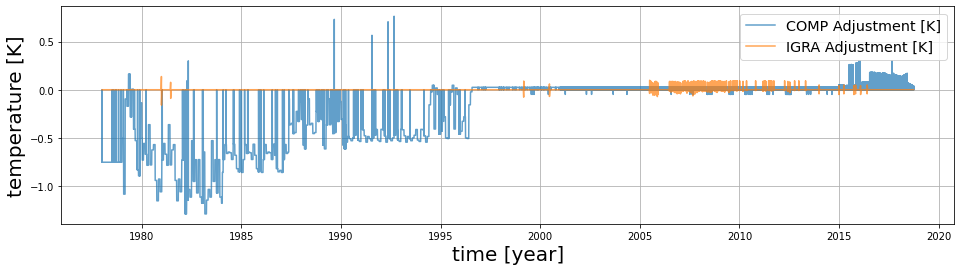

COMP Adjustment MEAN: -0.14908670013377218
COMP Adjustment MIN: -1.2905188
COMP Adjustment MAX: 0.76361865
IGRA Adjustment MEAN: -1.097393690096983e-05
IGRA Adjustment MIN: -0.1599999999999966
IGRA Adjustment MAX: 0.13714285714286234


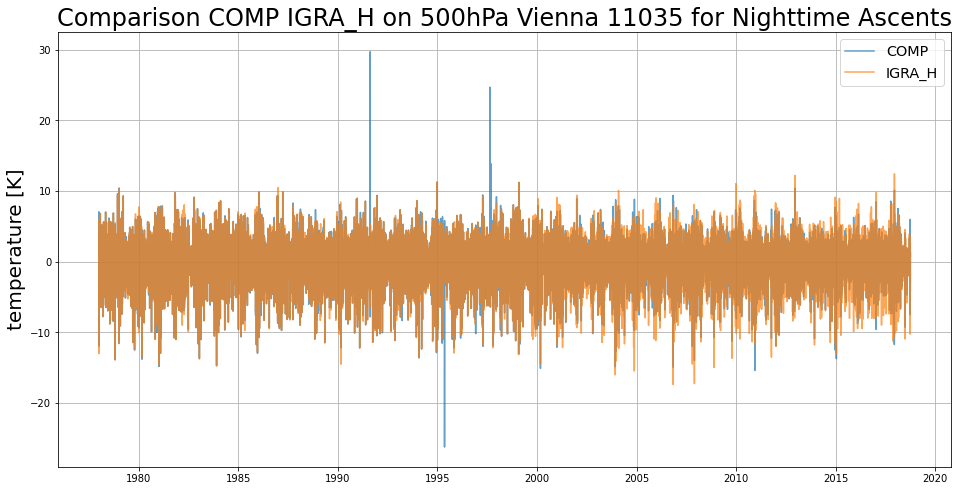

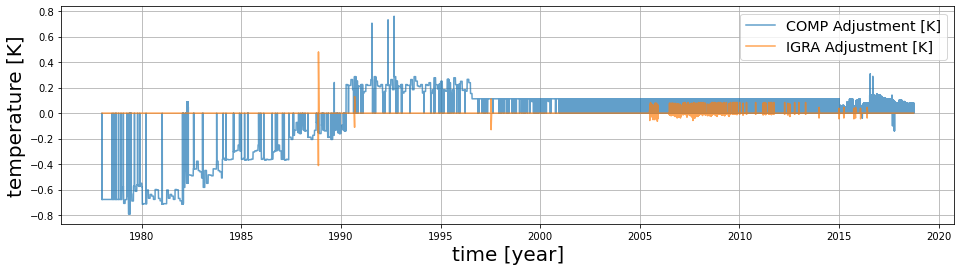

COMP Adjustment MEAN: -0.018922432591286672
COMP Adjustment MIN: -0.7902123000000001
COMP Adjustment MAX: 0.75954264
IGRA Adjustment MEAN: 3.284296955153013e-05
IGRA Adjustment MIN: -0.411428571428587
IGRA Adjustment MAX: 0.4800000000000182


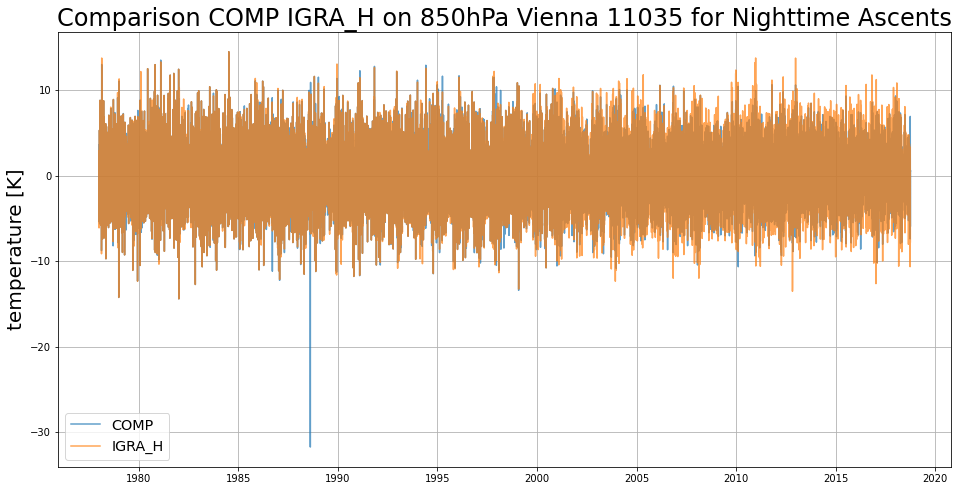

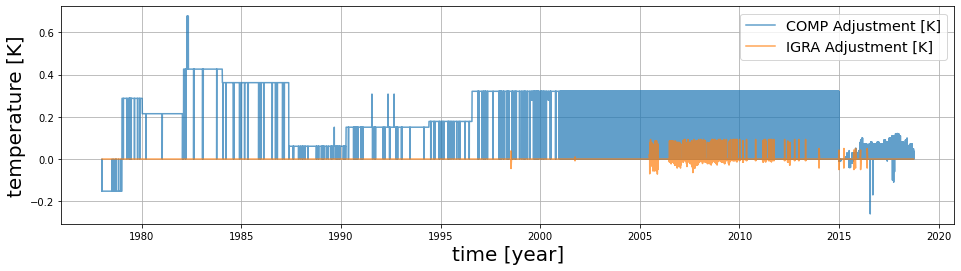

COMP Adjustment MEAN: 0.16065527467336682
COMP Adjustment MIN: -0.26
COMP Adjustment MAX: 0.6764051999999999
IGRA Adjustment MEAN: -3.0836702538417074e-06
IGRA Adjustment MIN: -0.07142857142849834
IGRA Adjustment MAX: 0.0928571428572127


In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    b = igra_h_ma[i]
    c = comp_ma[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(a.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))